# Imports

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import os
import time
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read in Data

In [2]:
data_path = '/content/drive/My Drive/Class Data/Data/Fun Data'
player_data = pd.read_csv('/content/drive/My Drive/Class Data/Data/Fun Data/2017-18_playerBoxScore.csv')

# Filtering & Cleaning



In [3]:
player_data.columns

Index(['gmDate', 'gmTime', 'seasTyp', 'playLNm', 'playFNm', 'teamAbbr',
       'teamConf', 'teamDiv', 'teamLoc', 'teamRslt', 'teamDayOff', 'offLNm1',
       'offFNm1', 'offLNm2', 'offFNm2', 'offLNm3', 'offFNm3', 'playDispNm',
       'playStat', 'playMin', 'playPos', 'playHeight', 'playWeight',
       'playBDate', 'playPTS', 'playAST', 'playTO', 'playSTL', 'playBLK',
       'playPF', 'playFGA', 'playFGM', 'playFG%', 'play2PA', 'play2PM',
       'play2P%', 'play3PA', 'play3PM', 'play3P%', 'playFTA', 'playFTM',
       'playFT%', 'playORB', 'playDRB', 'playTRB', 'opptAbbr', 'opptConf',
       'opptDiv', 'opptLoc', 'opptRslt', 'opptDayOff'],
      dtype='object')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
columns_to_drop = ['teamDayOff', 'offLNm1','offFNm1', 'offLNm2','offFNm2','offLNm3','offFNm3','playBDate','opptDiv','opptLoc','opptRslt','opptDayOff','seasTyp','opptAbbr','opptConf','teamConf','teamDiv','teamLoc','teamRslt','playLNm','playFNm','playStat']
player_data.drop(columns=columns_to_drop, axis=1, inplace=True)

In [6]:
player_data

,gmDate,gmTime,teamAbbr,playDispNm,playMin,playPos,playHeight,playWeight,playPTS,playAST,playTO,playSTL,playBLK,playPF,playFGA,playFGM,playFG%,play2PA,play2PM,play2P%,play3PA,play3PM,play3P%,playFTA,playFTM,playFT%,playORB,playDRB,playTRB
0,2017-10-17,08:00,BOS,Jaylen Brown,40,F,79,222,25,0,3,3,0,5,23,11,0.4783,14,9,0.6429,9,2,0.2222,2,1,0.5000,1,5,6
1,2017-10-17,08:00,BOS,Kyrie Irving,39,PG,75,191,22,10,2,3,0,4,17,8,0.4706,8,4,0.5000,9,4,0.4444,2,2,1.0000,2,2,4
2,2017-10-17,08:00,BOS,Jayson Tatum,37,SF,80,205,14,3,1,0,0,4,12,5,0.4167,10,4,0.4000,2,1,0.5000,3,3,1.0000,4,6,10
3,2017-10-17,08:00,BOS,Al Horford,32,C,82,245,9,5,0,0,1,2,7,2,0.2857,5,2,0.4000,2,0,0.0000,7,5,0.7143,0,7,7
4,2017-10-17,08:00,BOS,Gordon Hayward,5,SF,81,207,2,0,0,0,0,1,2,1,0.5000,1,1,1.0000,1,0,0.0000,0,0,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26104,2018-04-11,10:30,SAC,JaKarr Sampson,23,SF,81,214,11,0,0,0,1,1,8,5,0.6250,8,5,0.6250,0,0,0.0000,1,1,1.0000,0,4,4
26105,2018-04-11,10:30,SAC,Buddy Hield,28,SG,77,212,14,5,0,2,0,2,13,6,0.4615,9,4,0.4444,4,2,0.5000,1,0,0.0000,2,3,5
26106,2018-04-11,10:30,SAC,Nigel Hayes,27,SF,80,254,4,0,0,1,1,2,5,2,0.4000,3,2,0.6667,2,0,0.0000,0,0,0.0000,1,3,4
26107,2018-04-11,10:30,SAC,Vince Carter,25,SG,78,220,12,1,1,0,0,0,8,5,0.6250,5,3,0.6000,3,2,0.6667,0,0,0.0000,0,3,3


# Prepping Data For Analysis

In [7]:
cluster_data = player_data.groupby(['playDispNm'])[['playPTS', 'playAST', 'playTRB', 'playSTL', 'playBLK','playFGA','playMin']].mean()

team_data = player_data.groupby('playDispNm')['teamAbbr'].agg(lambda x: x.mode()[0])
position_data = player_data.groupby('playDispNm')['playPos'].agg(lambda x: x.mode()[0])
cluster_data = cluster_data.join(team_data).join(position_data)

games_played = player_data.groupby('playDispNm').size()
eligible_players = games_played[games_played >= 41].index
cluster_data = cluster_data.loc[cluster_data.index.isin(eligible_players)]

cluster_data = cluster_data[cluster_data['playMin'] >= 10]

cluster_data

,playPTS,playAST,playTRB,playSTL,playBLK,playFGA,playMin,teamAbbr,playPos
playDispNm,,,,,,,,,
Aaron Gordon,17.620690,2.344828,7.896552,1.000000,0.775862,14.931034,33.017241,ORL,PF
Abdel Nader,3.041667,0.541667,1.479167,0.312500,0.208333,3.104167,10.875000,BOS,SF
Al Horford,12.875000,4.708333,7.361111,0.597222,1.097222,10.458333,31.597222,BOS,PF
Al-Farouq Aminu,9.333333,1.217391,7.594203,1.159420,0.565217,8.434783,30.014493,POR,PF
Alec Burks,7.718750,1.046875,3.000000,0.593750,0.125000,6.468750,16.562500,UTA,SG
...,...,...,...,...,...,...,...,...,...
Yogi Ferrell,10.219512,2.451220,3.048780,0.792683,0.109756,8.914634,27.829268,DAL,PG
Zach Collins,4.424242,0.787879,3.348485,0.257576,0.469697,4.393939,15.833333,POR,C
Zach Randolph,14.525424,2.152542,6.728814,0.711864,0.169492,12.932203,25.542373,SAC,PF


# EDA

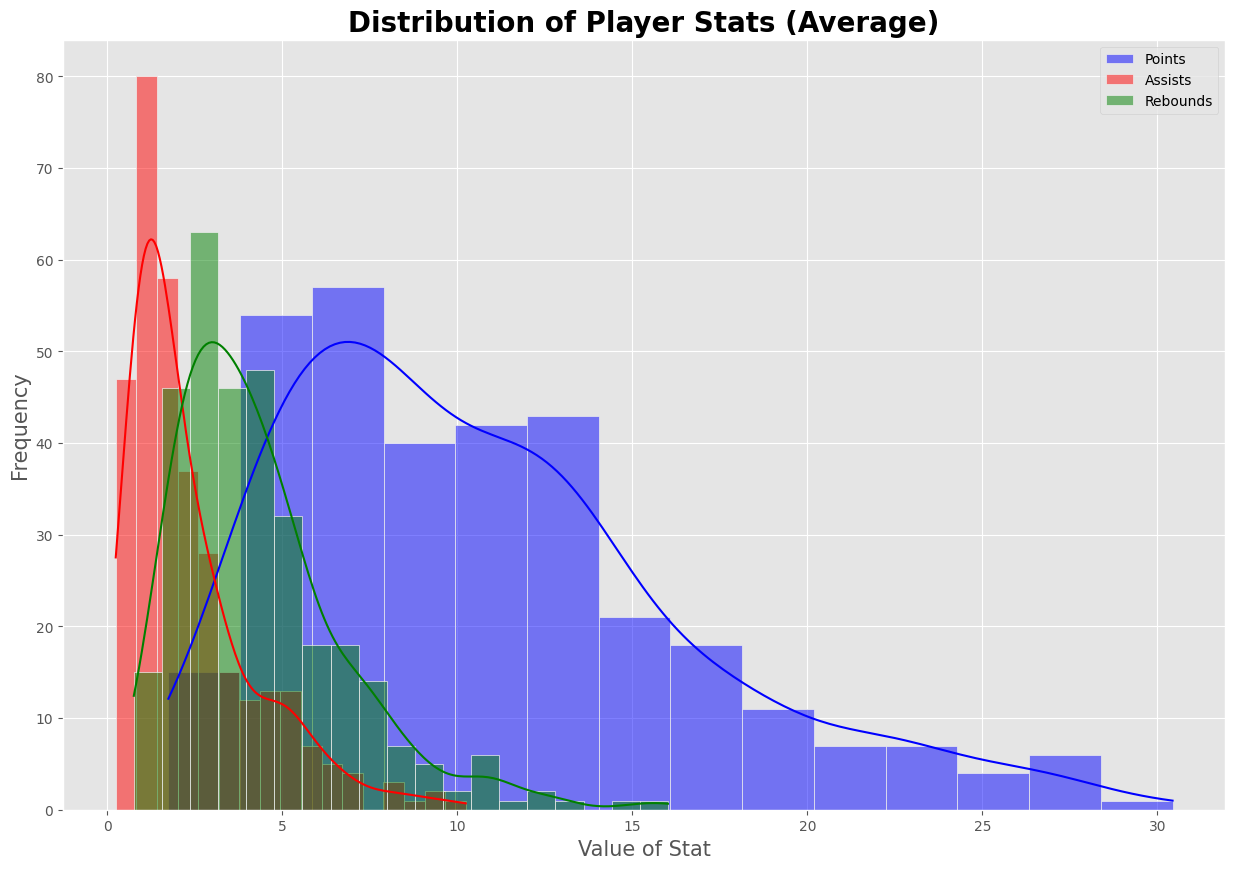

In [8]:
plt.figure(figsize=(15, 10))
sns.histplot(cluster_data['playPTS'], kde=True, color='blue', label='Points')
sns.histplot(cluster_data['playAST'], kde=True, color='red', label='Assists')
sns.histplot(cluster_data['playTRB'], kde=True, color='green', label='Rebounds')
plt.legend()
plt.title('Distribution of Player Stats (Average)',fontsize=20,fontweight='bold')
plt.xlabel('Value of Stat',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
save_path = os.path.join(data_path, 'distribution_of_stats.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

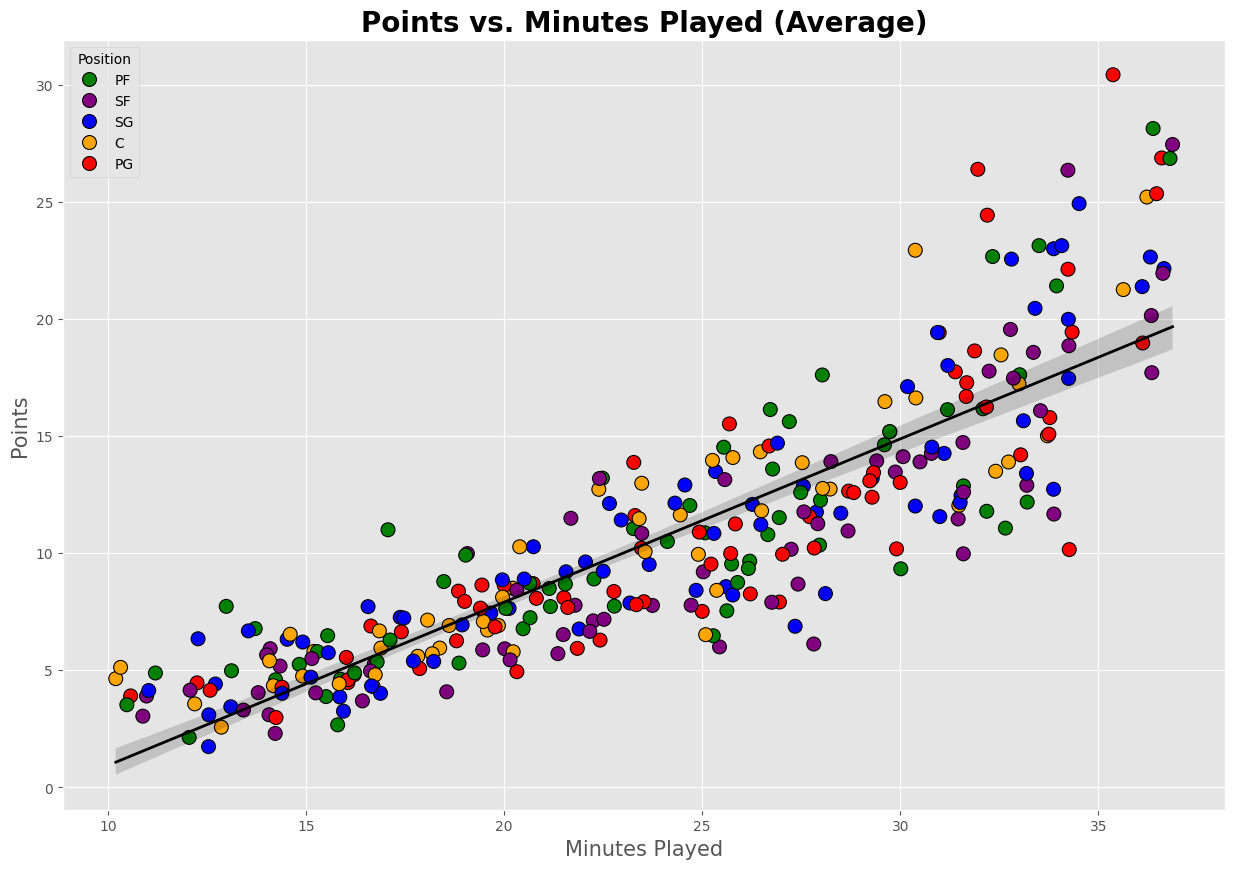

In [28]:
plt.figure(figsize=(15, 10))

sns.scatterplot(x='playMin', y='playPTS', data=cluster_data, hue='playPos',
                palette=custom_palette, edgecolor='black', s=100)

sns.regplot(x='playMin', y='playPTS', data=cluster_data, scatter=False,
            color='black', line_kws={'lw': 2})

plt.title('Points vs. Minutes Played (Average)', fontsize=20, fontweight='bold')
plt.xlabel('Minutes Played', fontsize=15)
plt.ylabel('Points', fontsize=15)
plt.legend(title='Position')
save_path = os.path.join(data_path, 'points_vs_mins2.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

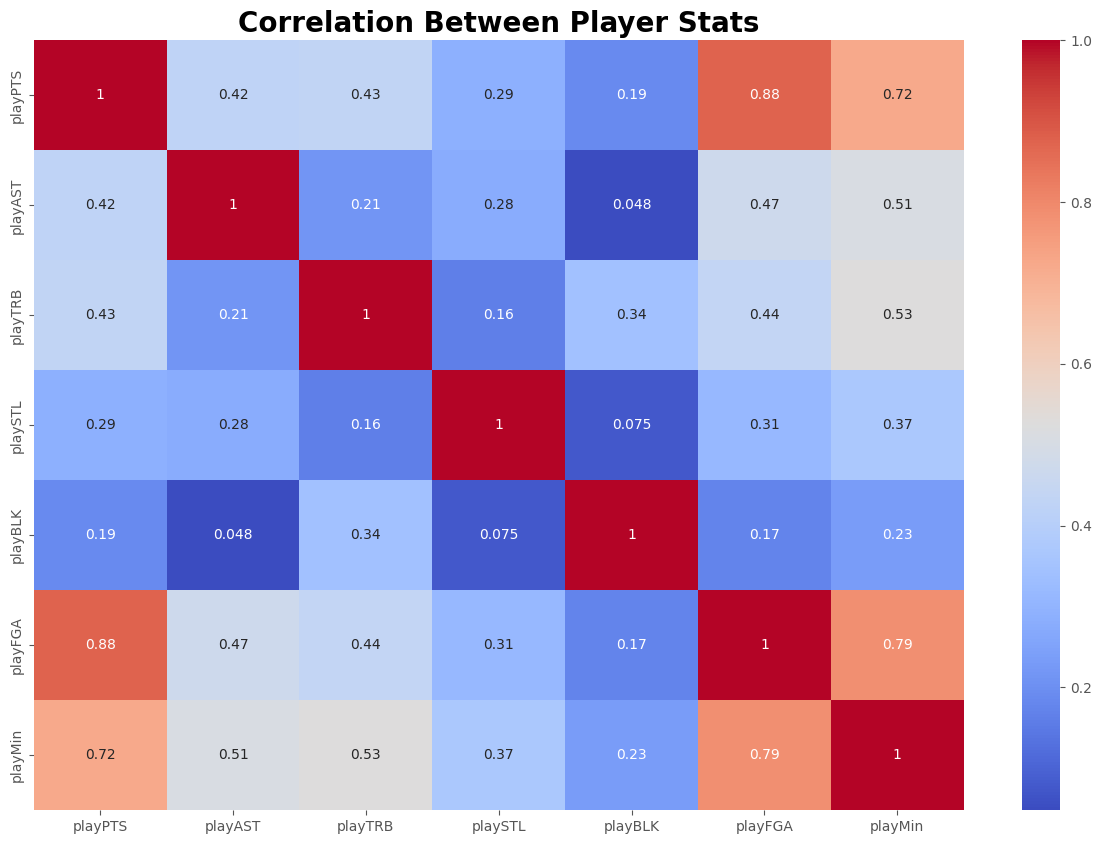

In [34]:
correlation_stats = player_data[['playPTS', 'playAST', 'playTRB', 'playSTL', 'playBLK','playFGA','playMin']].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_stats, annot=True, cmap="coolwarm", cbar=True, linecolor='black')
plt.title("Correlation Between Player Stats",fontsize=20,fontweight='bold')
save_path = os.path.join(data_path, 'corr_matr_stats.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

<ipython-input-25-c96d43ab4922>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='playPos', y='playPTS', data=cluster_data, ax=axes[0, 0], palette=custom_palette).set(title="Points by Position")
<ipython-input-25-c96d43ab4922>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='playPos', y='playAST', data=cluster_data, ax=axes[0, 1], palette=custom_palette).set(title="Assists by Position")
<ipython-input-25-c96d43ab4922>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='playPos', y='playTRB', data=cluster_data, ax=axes[1, 0], palette=

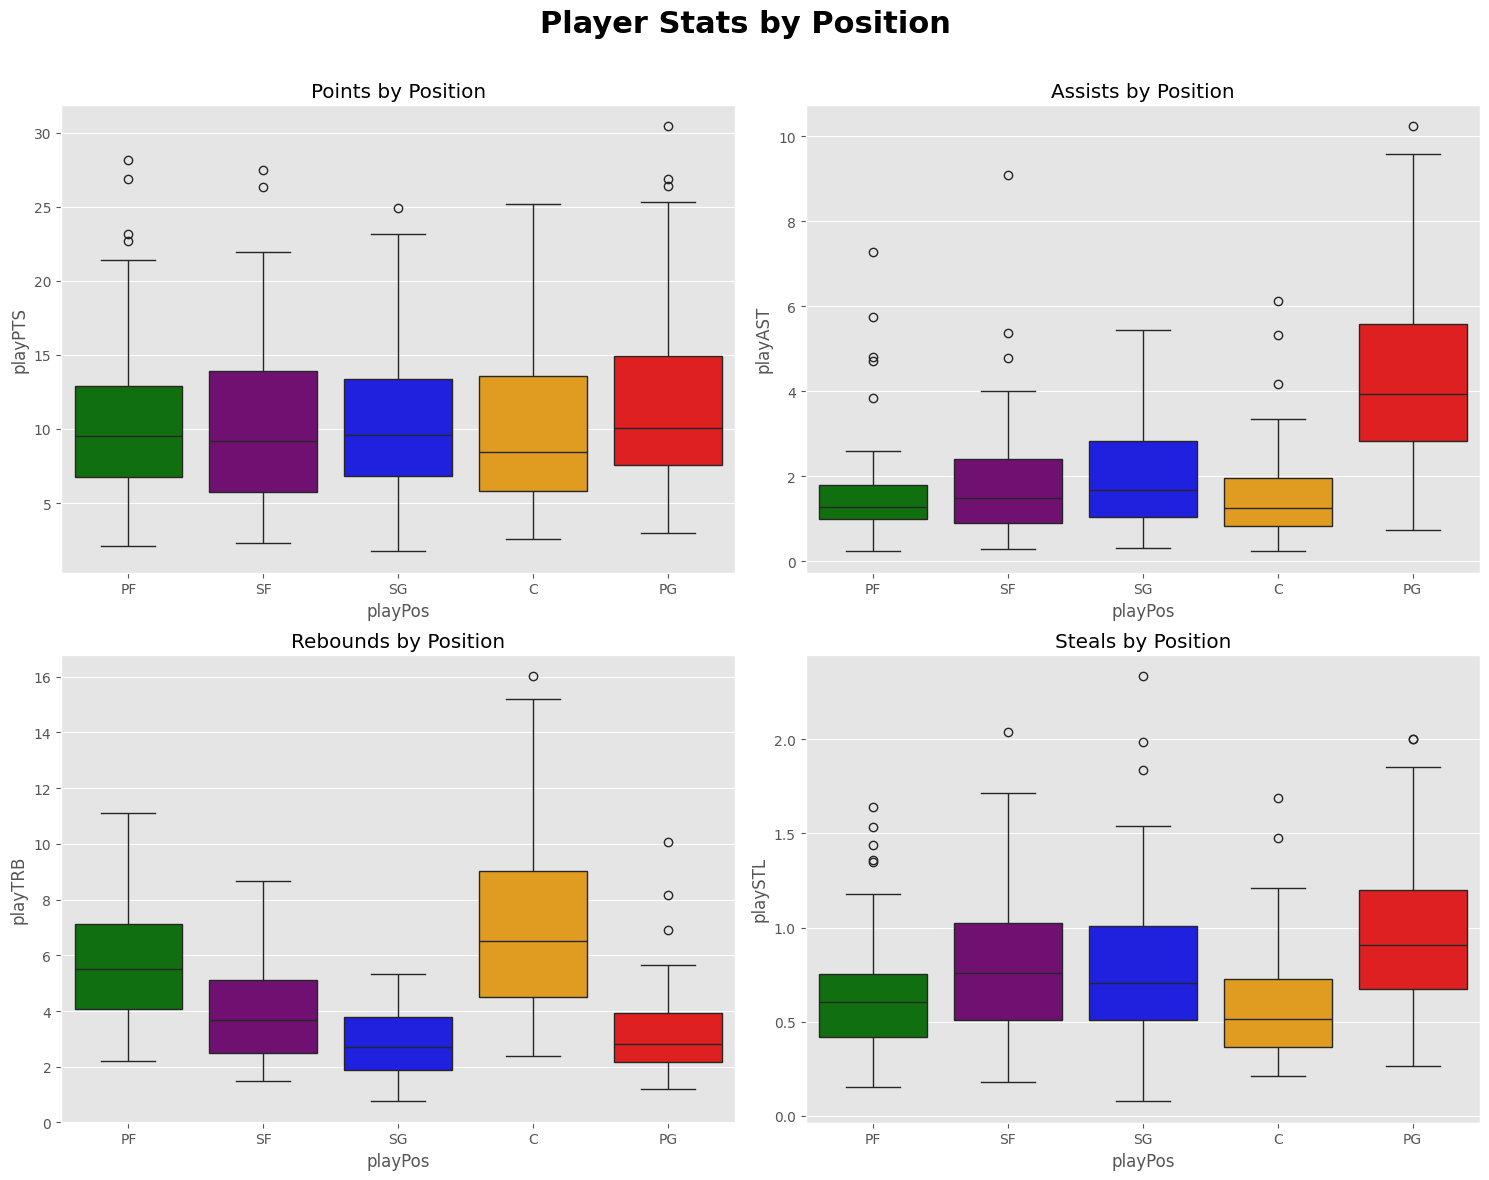

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

custom_palette = {
    'PG': 'red',      # Playmaker (red)
    'SG': 'blue',     # Scorer (blue)
    'SF': 'purple',   # All-Rounder (purple)
    'PF': 'green',    # Defender (green)
    'C': 'orange'     # Optional color for centers
}

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.boxplot(x='playPos', y='playPTS', data=cluster_data, ax=axes[0, 0], palette=custom_palette).set(title="Points by Position")
sns.boxplot(x='playPos', y='playAST', data=cluster_data, ax=axes[0, 1], palette=custom_palette).set(title="Assists by Position")
sns.boxplot(x='playPos', y='playTRB', data=cluster_data, ax=axes[1, 0], palette=custom_palette).set(title="Rebounds by Position")
sns.boxplot(x='playPos', y='playSTL', data=cluster_data, ax=axes[1, 1], palette=custom_palette).set(title="Steals by Position")


fig.suptitle('Player Stats by Position', fontsize=22, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
save_path = os.path.join(data_path, 'outliers_in_stats2.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

# Clustering

In [13]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = ['playPTS', 'playAST', 'playTRB', 'playFGA']

# Standardize the feature data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data[features])

# Apply K-Means clustering with a fixed number of clusters (4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_data['Role'] = kmeans.fit_predict(scaled_data)

# Analyze the clusters to determine correct role mapping
cluster_means = cluster_data.groupby('Role')[['playPTS', 'playAST', 'playTRB', 'playSTL', 'playBLK', 'playFGA']].mean()

# Assign Clusters to Roles Dynamically
scorer_cluster = cluster_means['playPTS'].idxmax()  # Highest scoring = Scorer

# Exclude Scorer when finding Playmaker
playmaker_cluster = cluster_means.drop(index=scorer_cluster)['playAST'].idxmax()

# Exclude Scorer when finding Defender
defensive_strength = cluster_means['playSTL'] + cluster_means['playBLK']
defender_cluster = defensive_strength.drop(index=scorer_cluster).idxmax()  # Best defender (excluding Scorer)

# Find the most "balanced" cluster for All-Rounder
remaining_clusters = set(cluster_means.index) - {scorer_cluster, playmaker_cluster, defender_cluster}
allrounder_cluster = min(remaining_clusters, key=lambda c: cluster_means.loc[c].std())

# Update cluster mapping dynamically
role_names = {
    scorer_cluster: "Scorer",
    playmaker_cluster: "Playmaker",
    defender_cluster: "Defender",
    allrounder_cluster: "All-Rounder"
}
cluster_data['Role'] = cluster_data['Role'].map(role_names)

# Verify the cluster assignments
role_stats = cluster_data.groupby('Role')[['playPTS', 'playAST', 'playTRB', 'playSTL', 'playBLK', 'playFGA']].mean()
role_stats


,playPTS,playAST,playTRB,playSTL,playBLK,playFGA
Role,,,,,,
All-Rounder,6.209155,1.303512,3.119361,0.550334,0.376853,5.117780
Defender,13.350437,1.770344,7.718836,0.782122,0.813891,10.409219
Playmaker,12.304075,3.452403,3.599807,0.956077,0.337570,10.392017
Scorer,22.305535,5.338684,6.152567,1.264074,0.728125,16.967307


# Prepare For Analysis & Plotting

In [14]:
cluster_data.head(5)

,playPTS,playAST,playTRB,playSTL,playBLK,playFGA,playMin,teamAbbr,playPos,Role
playDispNm,,,,,,,,,,
Aaron Gordon,17.620690,2.344828,7.896552,1.000000,0.775862,14.931034,33.017241,ORL,PF,Defender
Abdel Nader,3.041667,0.541667,1.479167,0.312500,0.208333,3.104167,10.875000,BOS,SF,All-Rounder
Al Horford,12.875000,4.708333,7.361111,0.597222,1.097222,10.458333,31.597222,BOS,PF,Defender
Al-Farouq Aminu,9.333333,1.217391,7.594203,1.159420,0.565217,8.434783,30.014493,POR,PF,Defender
Alec Burks,7.718750,1.046875,3.000000,0.593750,0.125000,6.468750,16.562500,UTA,SG,All-Rounder


In [15]:
cluster_data = cluster_data.reset_index()

# Plotting

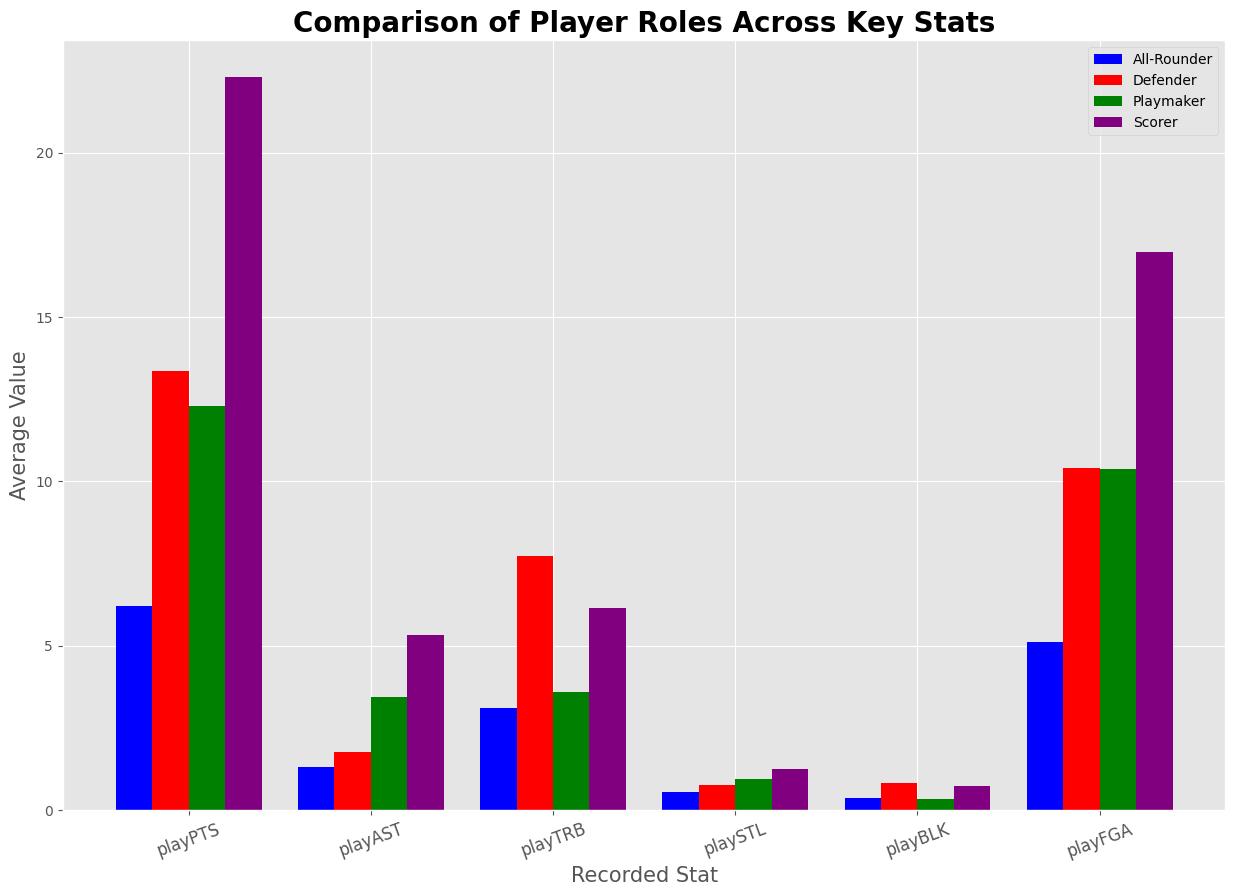

In [16]:
import matplotlib.pyplot as plt
import numpy as np

stats = ['playPTS', 'playAST', 'playTRB', 'playSTL', 'playBLK', 'playFGA']
colors = ['blue', 'red', 'green', 'purple']
roles = role_stats.index

x = np.arange(len(stats))
width = 0.2

fig, ax = plt.subplots(figsize=(15, 10))

for i, (role, color) in enumerate(zip(roles, colors)):
    ax.bar(x + i * width, role_stats.loc[role, stats], width=width, label=role, color=color)


ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(stats, fontsize=12)
ax.set_ylabel("Average Value", fontsize=15)
ax.set_xlabel("Recorded Stat", fontsize=15)
ax.set_title("Comparison of Player Roles Across Key Stats", fontsize=20, fontweight='bold')
ax.legend()
plt.xticks(rotation=20)
save_path = os.path.join(data_path, 'Comparison Key Stats Roles.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

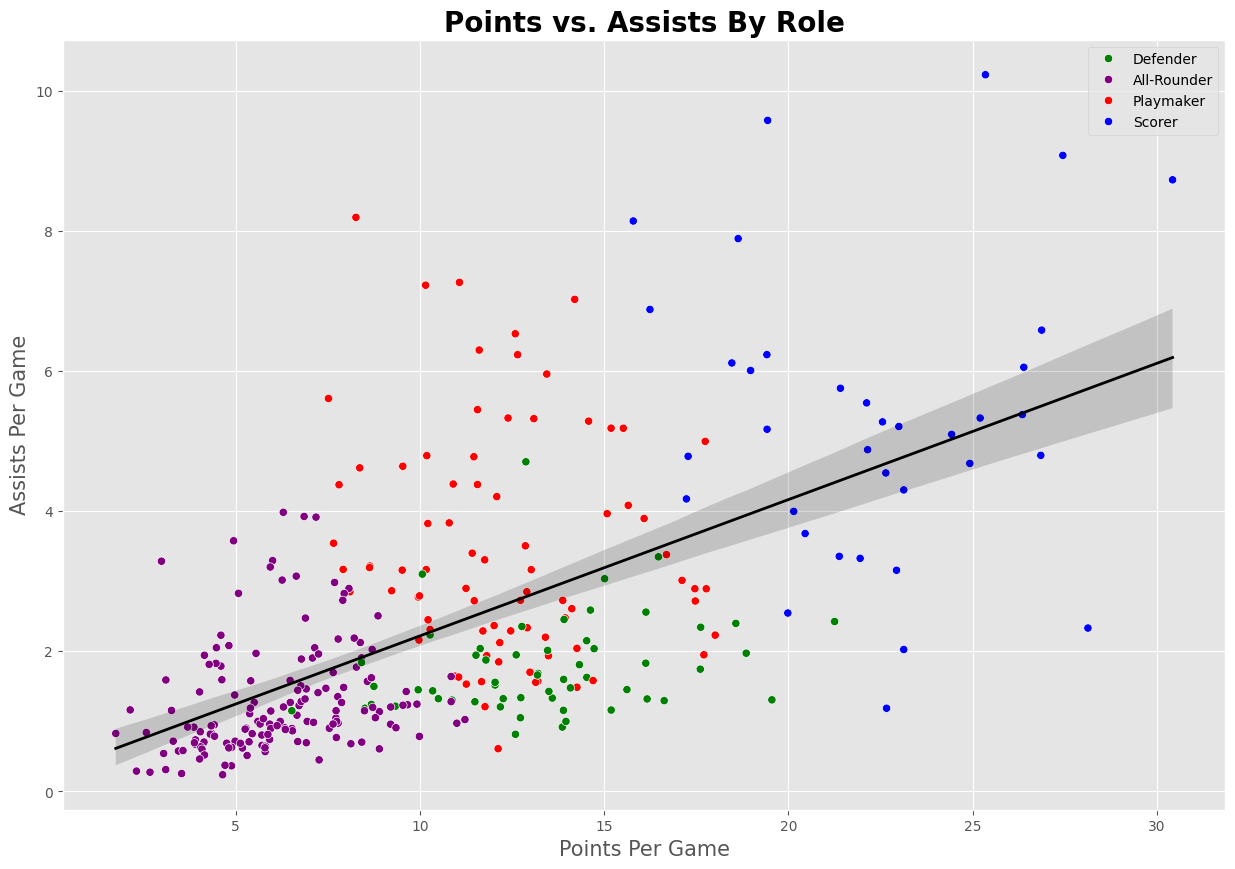

In [17]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='playPTS', y='playAST', hue='Role', data=cluster_data, palette={'Scorer': 'blue', 'Playmaker': 'red', 'Defender': 'green', 'All-Rounder': 'purple'})
sns.regplot(x='playPTS', y='playAST', data=cluster_data, scatter=False, color='black', line_kws={'lw': 2})
plt.title("Points vs. Assists By Role", fontsize=20, fontweight='bold')
plt.xlabel("Points Per Game", fontsize=15)
plt.ylabel("Assists Per Game", fontsize=15)
plt.legend()
save_path = os.path.join(data_path, 'Points VS Assists.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()


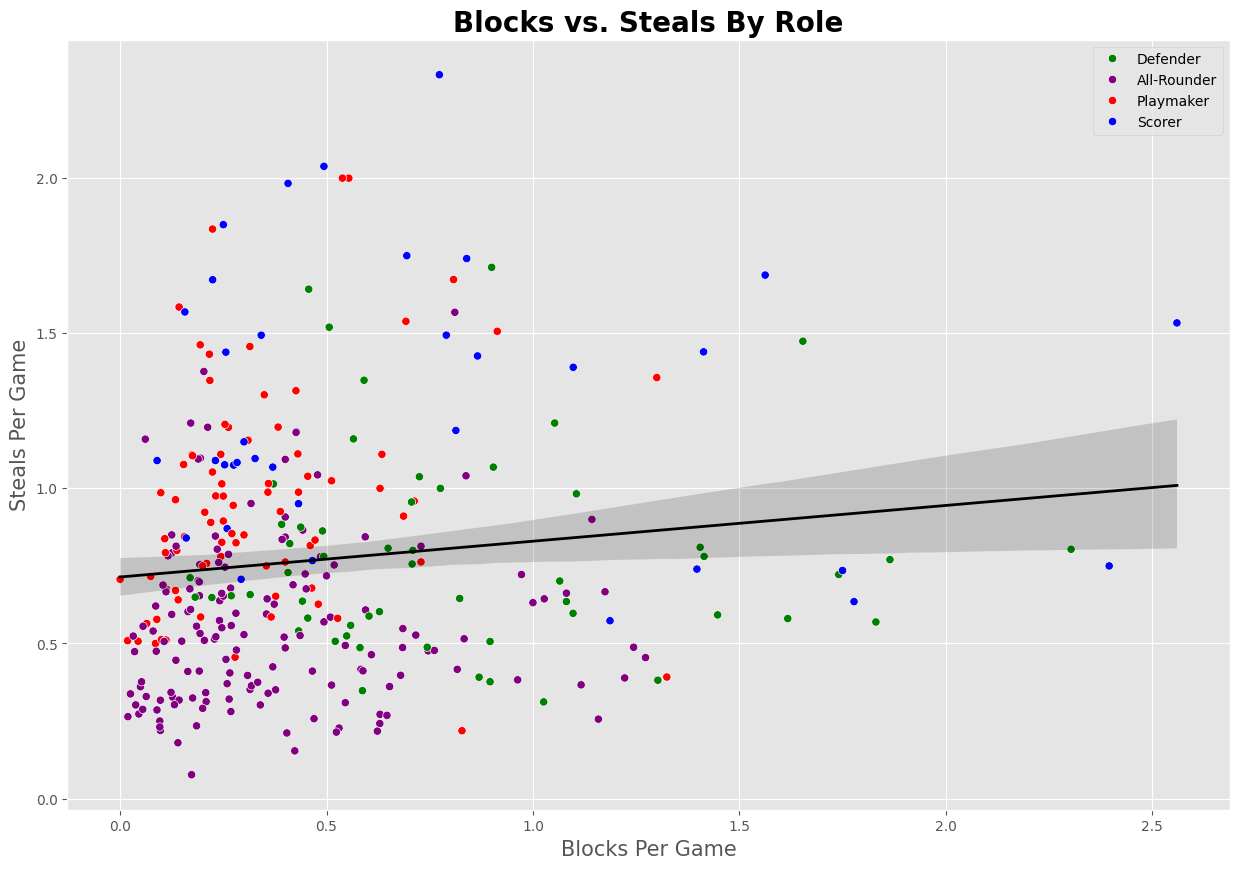

In [18]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='playBLK', y='playSTL', hue='Role', data=cluster_data, palette={'Scorer': 'blue', 'Playmaker': 'red', 'Defender': 'green', 'All-Rounder': 'purple'})
sns.regplot(x='playBLK', y='playSTL', data=cluster_data, scatter=False, color='black', line_kws={'lw': 2})
plt.title("Blocks vs. Steals By Role", fontsize=20, fontweight='bold')
plt.xlabel("Blocks Per Game", fontsize=15)
plt.ylabel("Steals Per Game", fontsize=15)
plt.legend()
save_path = os.path.join(data_path, 'Blocks VS Steals.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

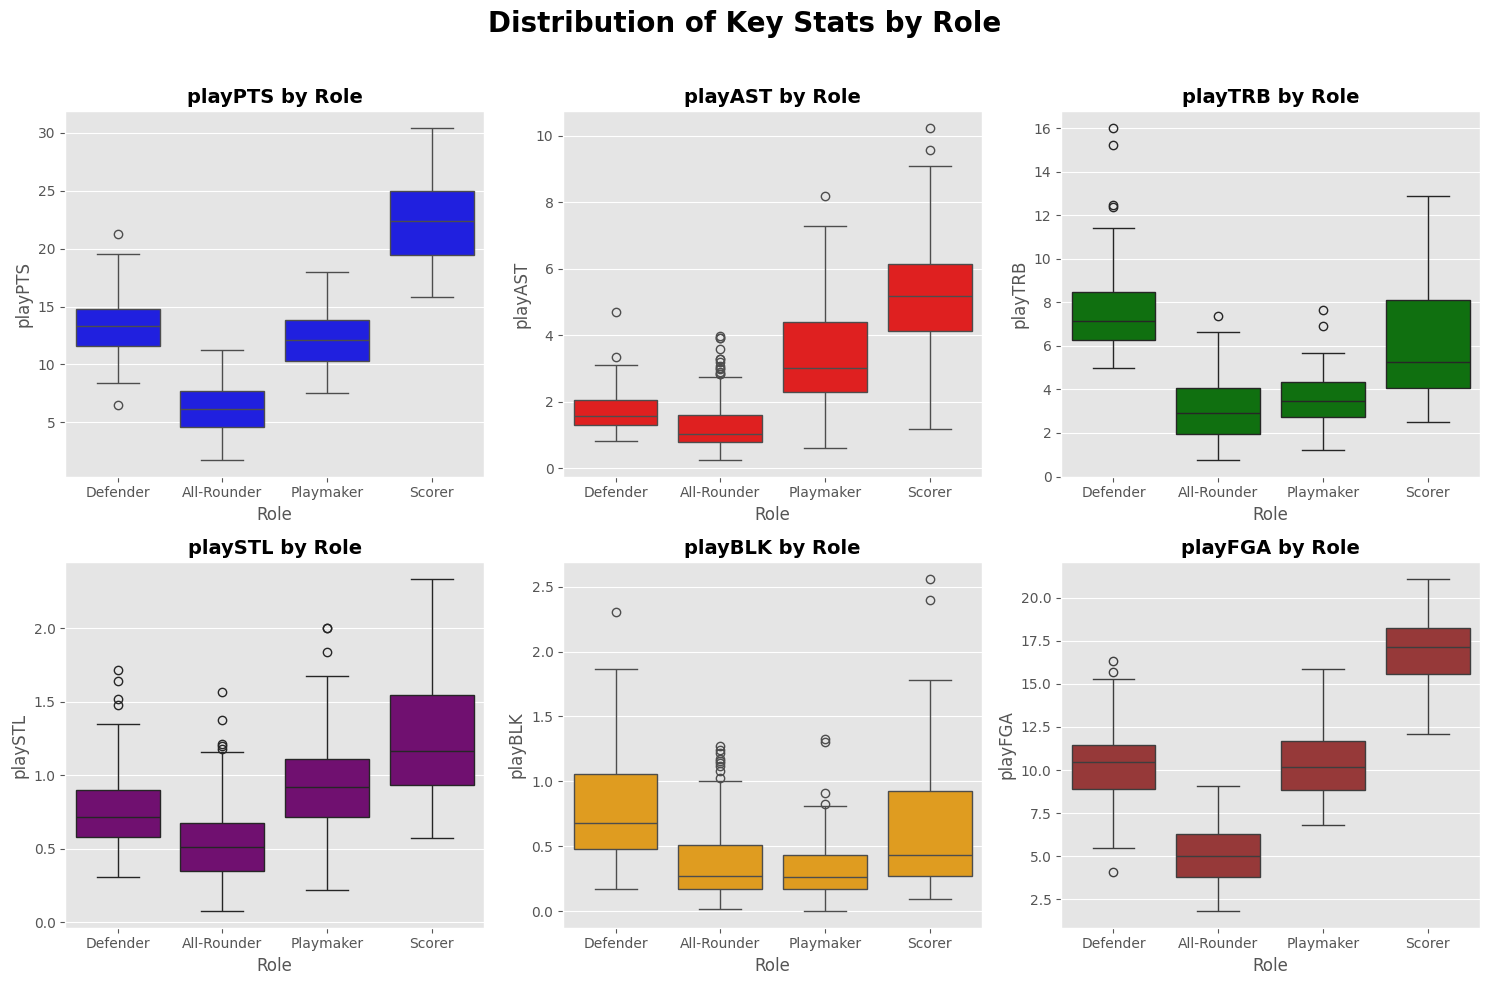

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
stats = ['playPTS', 'playAST', 'playTRB', 'playSTL', 'playBLK', 'playFGA']
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown']

for i, (stat, color) in enumerate(zip(stats, colors)):
    row, col = divmod(i, 3)
    sns.boxplot(x='Role', y=stat, data=cluster_data, ax=axes[row, col], color=color)
    axes[row, col].set_title(f"{stat} by Role", fontsize=14, fontweight='bold')

plt.suptitle("Distribution of Key Stats by Role", fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
save_path = os.path.join(data_path, 'Dist of Stats by Role.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

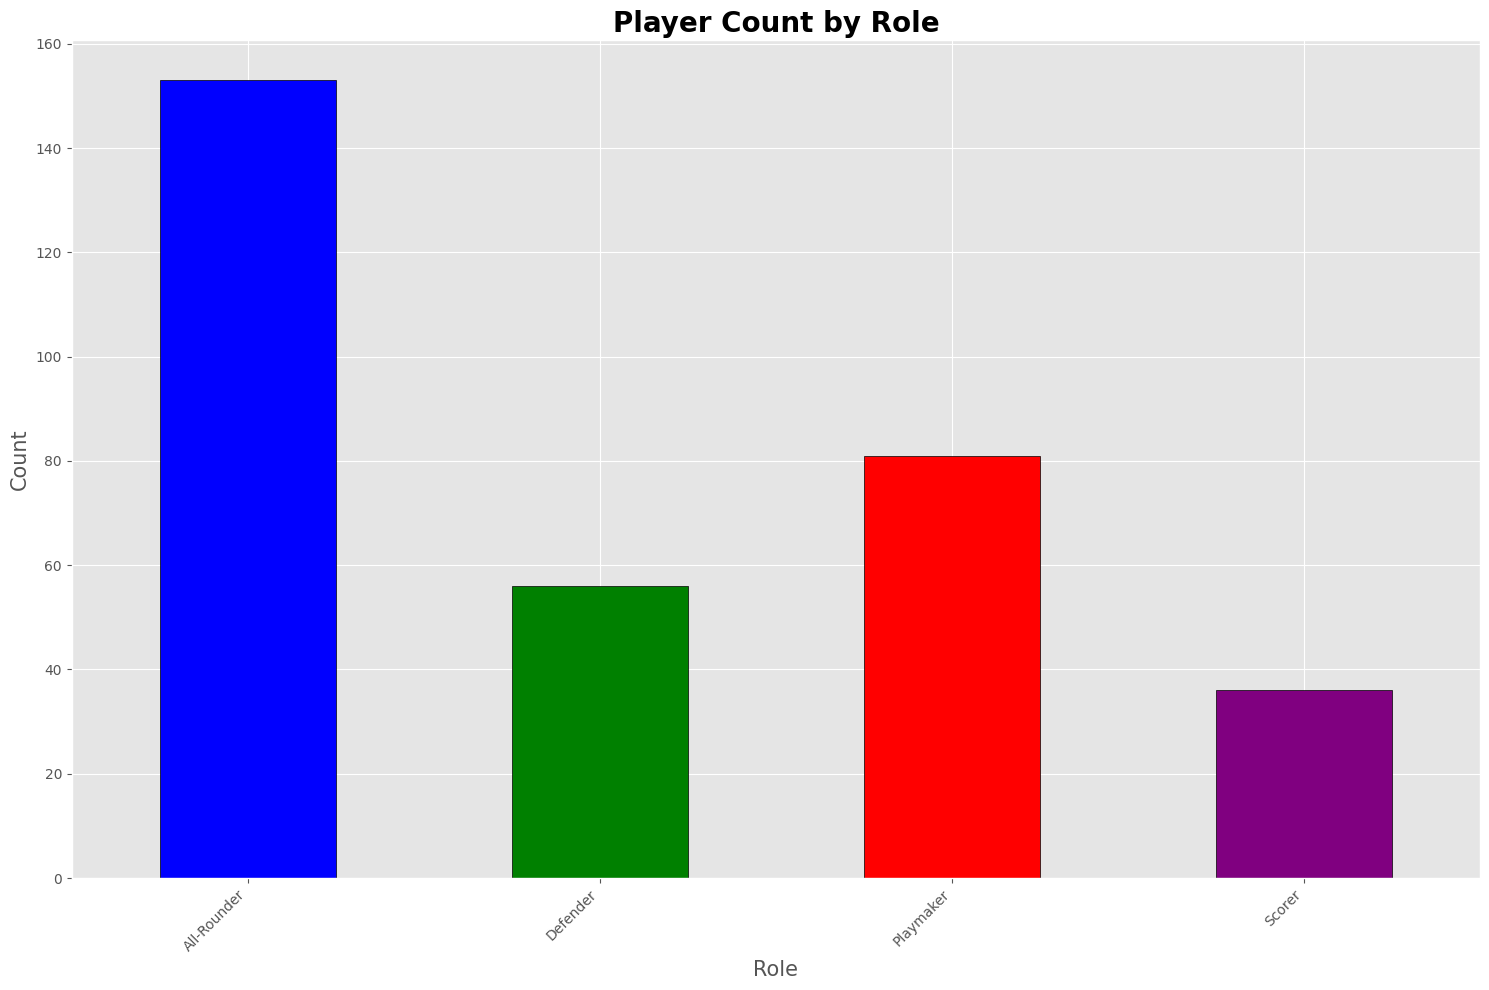

In [20]:
role_counts = cluster_data.groupby('Role').size()

role_colors = {
    'All-Rounder': 'blue',
    'Defender': 'green',
    'Playmaker': 'red',
    'Scorer': 'purple'
}

plt.figure(figsize=(15, 10))
role_counts.plot(kind='bar', color=[role_colors[role] for role in role_counts.index], edgecolor='black')
plt.title('Player Count by Role', fontsize=20, fontweight='bold')
plt.xlabel('Role', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
save_path = os.path.join(data_path, 'Player Count By Role.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()


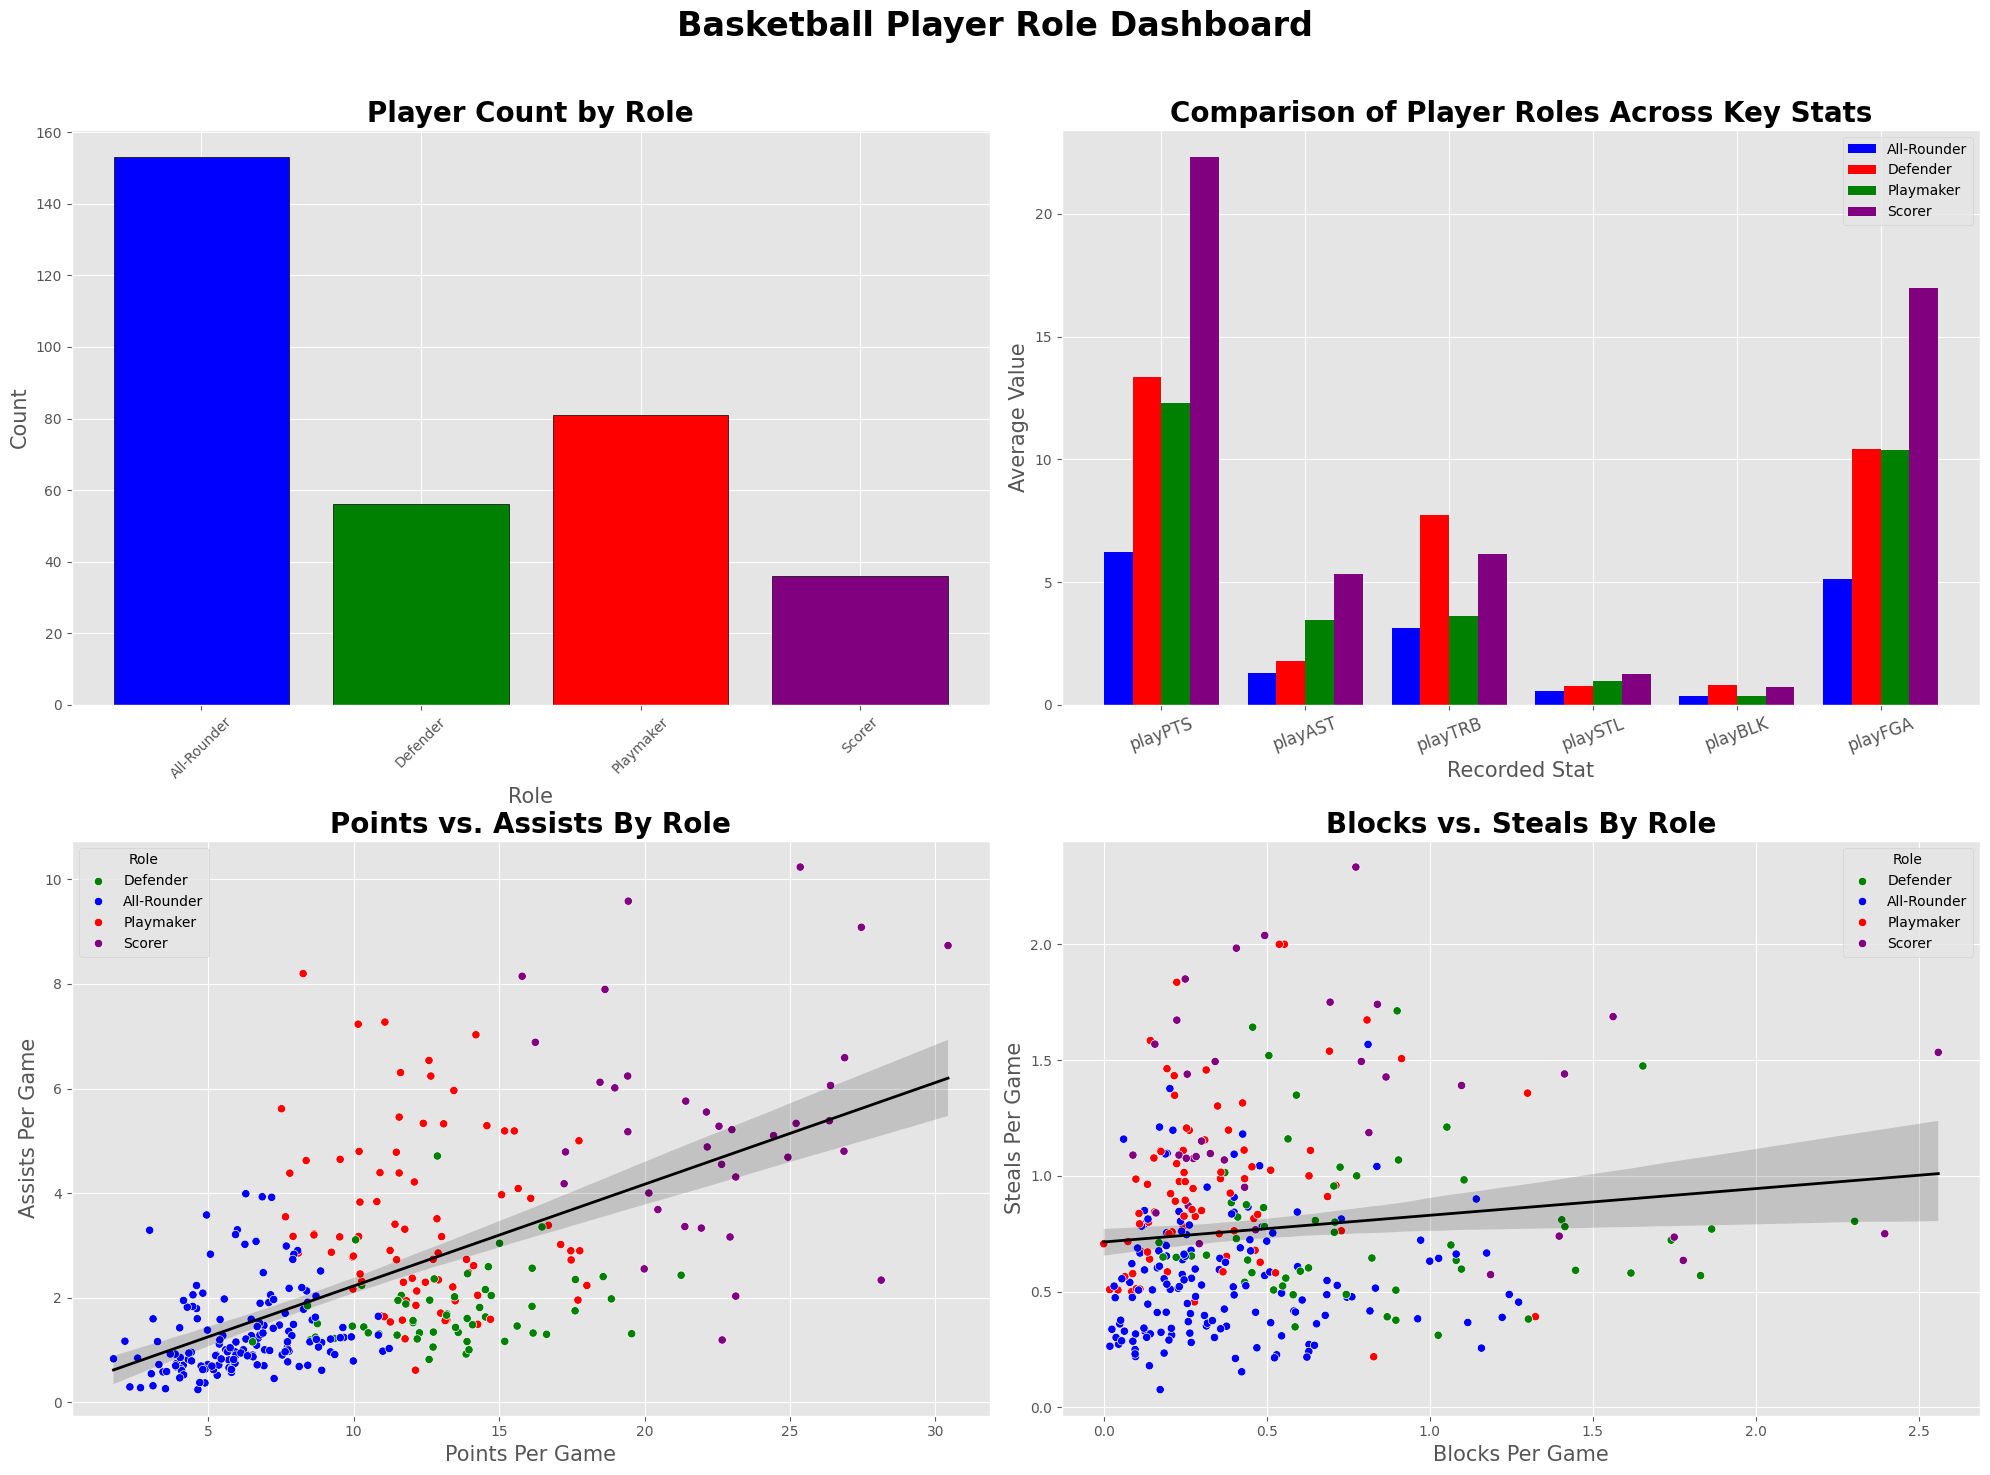

In [21]:
import os

role_counts = cluster_data.groupby('Role').size()
role_colors = {
    'All-Rounder': 'blue',
    'Defender': 'green',
    'Playmaker': 'red',
    'Scorer': 'purple'
}

stats = ['playPTS', 'playAST', 'playTRB', 'playSTL', 'playBLK', 'playFGA']
colors = ['blue', 'red', 'green', 'purple']

fig, axes = plt.subplots(2, 2, figsize=(20, 15))

axes[0, 0].bar(role_counts.index, role_counts.values, color=[role_colors[role] for role in role_counts.index], edgecolor='black')
axes[0, 0].set_title('Player Count by Role', fontsize=20, fontweight='bold')
axes[0, 0].set_xlabel('Role', fontsize=15)
axes[0, 0].set_ylabel('Count', fontsize=15)
axes[0, 0].tick_params(axis='x', rotation=45)

x = np.arange(len(stats))
width = 0.2

for i, (role, color) in enumerate(zip(role_counts.index, colors)):
    axes[0, 1].bar(x + i * width, role_stats.loc[role, stats], width=width, label=role, color=color)

axes[0, 1].set_xticks(x + width * 1.5)
axes[0, 1].set_xticklabels(stats, fontsize=12)
axes[0, 1].set_ylabel("Average Value", fontsize=15)
axes[0, 1].set_xlabel("Recorded Stat", fontsize=15)
axes[0, 1].set_title("Comparison of Player Roles Across Key Stats", fontsize=20, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].tick_params(axis='x', rotation=20)

sns.scatterplot(x='playPTS', y='playAST', hue='Role', data=cluster_data, palette=role_colors, ax=axes[1, 0])
sns.regplot(x='playPTS', y='playAST', data=cluster_data, scatter=False, color='black', line_kws={'lw': 2}, ax=axes[1, 0])
axes[1, 0].set_title("Points vs. Assists By Role", fontsize=20, fontweight='bold')
axes[1, 0].set_xlabel("Points Per Game", fontsize=15)
axes[1, 0].set_ylabel("Assists Per Game", fontsize=15)

sns.scatterplot(x='playBLK', y='playSTL', hue='Role', data=cluster_data, palette=role_colors, ax=axes[1, 1])
sns.regplot(x='playBLK', y='playSTL', data=cluster_data, scatter=False, color='black', line_kws={'lw': 2}, ax=axes[1, 1])
axes[1, 1].set_title("Blocks vs. Steals By Role", fontsize=20, fontweight='bold')
axes[1, 1].set_xlabel("Blocks Per Game", fontsize=15)
axes[1, 1].set_ylabel("Steals Per Game", fontsize=15)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle('Basketball Player Role Dashboard', fontsize=24, fontweight='bold')
save_path = os.path.join(data_path, 'player_role_dashboard.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

# Boston Example:

In [22]:
team_bos_data = cluster_data[cluster_data['teamAbbr'] == 'BOS'].groupby('Role')['Role'].size()

team_bos_data

,Role
Role,
All-Rounder,5
Defender,5
Playmaker,2
Scorer,1


In [23]:
cluster_data.groupby(['Role','teamAbbr'])['Role'].size().unstack().mean(axis=1)

,0
Role,
All-Rounder,5.100000
Defender,2.000000
Playmaker,2.892857
Scorer,1.565217
